# Project 1 ECE 236A

**Samuel Gessow** (sgessow@gmail.com), **Steven Zhiying Li** (zhiyingli@g.ucla.edu), **Sunay Bhat** (sunaybhat1@ucla.edu), **Terri Tsai** (terri0716@gmail.com), **Dominic Yang** (domyang@g.ucla.edu)

In this project, We are going to implement a robust classifier that can operate if some of the inputs are
missing.

In [1]:
import pandas as pd
import numpy as np
import cvxpy as cp

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import MyClassifier as mc

# for automatically reloading the imported modules
%load_ext autoreload
%autoreload 2

## Loading data
In this project, we will first try using the MNIST dataset. 

***Remark***: *However, it's not specific which image dataset will be used to evaluate our project result in the end. So we will try to moidify our result after we have gotten solid result from MNIST data.* 

In [2]:
# Load Data from CSV (this module may take longer time)
train_rawdata = np.genfromtxt("./dataset/mnist_train.csv", delimiter=",")
test_rawdata = np.genfromtxt("./dataset/mnist_test.csv", delimiter=",") 

In [3]:
print(train_rawdata.shape)
print(test_rawdata.shape)

(60001, 785)
(10001, 785)


Notice the first line of both `train_rawdata` and `test_rawdata` are `NaN`, so we remove them in the subsequent steps. And, for each row of the raw data, the first number is the label, and the rest are the image pixels.

In [8]:
train_data = train_rawdata[1:, 1:]
train_label = train_rawdata[1:, 0]

test_data = test_rawdata[1:, 1:]
test_label = test_rawdata[1:, 0]

In [5]:
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


Now we will try to visualize some of the label and data.

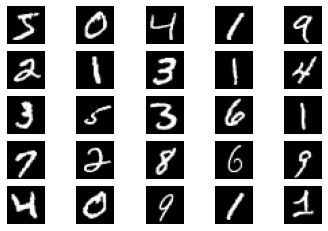

5 0 4 1 9 
2 1 3 1 4 
3 5 3 6 1 
7 2 8 6 9 
4 0 9 1 1 


In [6]:
fig1 = plt.figure(1)
spec1 = gridspec.GridSpec(ncols=5, nrows=5, figure=fig1)
for i in range(5):
    for j in range(5):
        f2_ax = fig1.add_subplot(spec1[i, j]) 
        plt.imshow(np.reshape(train_data[i*5+j,:], (28, 28)), cmap='gray', vmin=0, vmax=255)
        plt.axis('off')
        
plt.show(fig1)

for i in range(5):
    for j in range(5):
        print(int(train_label[i*5+j]), end=' ')
    print("")

## Binary classification
We wantto classify if a number is $s_i$ or not $s_i$. In the code below, I will let $s_i = 0$.

**Math of Linear Classification**

Let
    \begin{aligned}
    K &= \text{number of classes}\\
    M &= \text{number of features}\\
    N &= \text{total number of training samples}
    \end{aligned}

Consider a sets of points $x_1, x_2, \dots, x_N \in \mathbf{R}^M$. Each point comes with an associated label $s_i \in \{+1, -1\}$. The training data are given as $(x_i, s_i)$ for $i = 1, \dots, N$.

The goal is to find a hyperplane $\mathcal{H} = \{x \mid a^Tx+b = 0\}$ such that
\begin{aligned}
s_i = -1 \ \text{ if } \ a^Tx_i + b \leqslant -1 \\
s_i = +1 \ \text{ if } \ a^Tx_i + b \geqslant -1 
\end{aligned}

The unknown varialbes are $a,b \in \mathbf{R}^M$

The objective function will be
$$\sum\limits_{i=1}^N \max \left\lbrace 0, 1 - s_i \left(a^Tx_i + b\right)\right\rbrace$$

To write it in LP form, it is
\begin{array}{rl}
\text{maximize} & \sum\limits_{i=1}^N t\\
\text{subject to} & 0 \leqslant t_i, \ i =1,\dots,N\\
& 1 - s_i \left(a^Tx_i + b\right) \leqslant t_i, \ i =1,\dots,N
\end{array}


In [9]:
K = len(np.unique(train_label)) # number of class
M = len(train_data[1,:])# number of features
model = mc.MyClassifier(K, M)

In [12]:
N = 5000 # reduce to smaller value (0 ~ 60000) for the purpose of debugging
[W,b] = model.train_binaryClassification(0, train_data[0:N,:], train_label[0:N],verb=True)

This is train_binaryClassification, you are training  0 ...

ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +3.169e+00  +6.669e+02  +2e+04  9e-01  2e+02  1e+00  2e+00    ---    ---    2  1  - |  -  - 
 1  +1.260e+01  +1.858e+02  +9e+03  2e-01  6e+01  9e-01  6e-01  0.6934  1e-01   2  1  1 |  0  0
 2  +6.170e+00  +4.142e+01  +2e+03  5e-02  1e+01  2e-01  1e-01  0.8190  7e-02   2  2  1 |  0  0
 3  +2.914e-01  +1.259e+00  +6e+01  1e-03  3e-01  7e-03  4e-03  0.9727  2e-03   1  1  1 |  0  0
 4  +3.217e-03  +1.393e-02  +7e-01  1e-05  4e-03  7e-05  5e-05  0.9890  1e-04   1  1  1 |  0  0
 5  +3.554e-05  +1.544e-04  +8e-03  2e-07  4e-05  8e-07  5e-07  0.9890  1e-04   0  1  1 |  0  0
 6  +3.927e-07  +1.710e-06  +9e-05  2e-09  5e-07  9e-09  6e-09  0.9890  1e-04   0  1  1 |  0  0
 7  +4.342e-09  +1.895e-08  +1e-06  2e-11  5e-09  1e-10  6e-11  0.9890  1e-04   0 

In [13]:
# test accuracy about whether the data is zero or not

mask_test_the_label     = (test_label == 0)
mask_test_NOT_the_label = (test_label != 0)

new_test_label = np.array(test_label, copy=True)
new_test_label.shape

new_test_label[mask_test_the_label] = 1
new_test_label[mask_test_NOT_the_label] = -1

N = test_data.shape[0]
pred = np.zeros(N)
for i in range(N):
    x_i = test_data[i,:]
    if x_i.T @ W + b >= 0:
        pred[i] = 1
    else:
        pred[i] = -1

print("the accuracy is", sum(pred == new_test_label)/N)

the accuracy is 0.9791


## Scaling up to classifying 10 classes

In the previous steps, we have build a binary linear classifier (essentially a hyperblane $\mathcal{H}_{s_i} = a_{s_i}^T x_i + b_{s_i}$). It can determine wheather the label is $s_i$ or not $s_i$. 

So we only have to build 10 such binary classifiers for each label, and the predicting label can be achieved by taking the argmax of each bineary predictor.

$$\text{pred(x_i)} = \text{argmax}\left\lbrace 
a_{0}^T x_i + b_0, \ \
a_{1}^T x_i + b_1, \ \
\cdots  \ \ ,  \ \
a_{9}^T x_i + b_9 
\right\rbrace
$$

*The following function may be a fairly longer for excuting (about 45 mins, I assume)*

In [15]:
p = 1 # p is set to 1 for now
model.train(p, train_data, train_label)

You are calling train()...
This is train_binaryClassification, you are training  0.0 ...
This is train_binaryClassification, you are training  1.0 ...
This is train_binaryClassification, you are training  2.0 ...
This is train_binaryClassification, you are training  3.0 ...
This is train_binaryClassification, you are training  4.0 ...
This is train_binaryClassification, you are training  5.0 ...
This is train_binaryClassification, you are training  6.0 ...
This is train_binaryClassification, you are training  7.0 ...
This is train_binaryClassification, you are training  8.0 ...
This is train_binaryClassification, you are training  9.0 ...


In [16]:
pred = model.classify(test_data)
N = test_data.shape[0]
print("the accuracy is", sum(pred == test_label)/N)

the accuracy is 0.7644


**When we reduce prediction any two classes, the result is not too bad either...**

In [17]:
for i in np.unique(train_label):
    for j in np.unique(train_label):
        if i==j:
            continue
        else:
            mask = (test_label == i) | (test_label == j) 
            new_test_data = test_data[mask,:]
            new_test_label = test_label[mask]
            pred = model.classify(new_test_data)
            N = new_test_data.shape[0]
            print(i, "&", j,  " Acc:", sum(pred == new_test_label)/N)
    

0.0 & 1.0  Acc: 0.8799054373522459
0.0 & 2.0  Acc: 0.7693836978131213
0.0 & 3.0  Acc: 0.7919597989949749
0.0 & 4.0  Acc: 0.8430173292558614
0.0 & 5.0  Acc: 0.7708333333333334
0.0 & 6.0  Acc: 0.8379772961816305
0.0 & 7.0  Acc: 0.8346613545816733
0.0 & 8.0  Acc: 0.7773797338792221
0.0 & 9.0  Acc: 0.7998994469582705
1.0 & 0.0  Acc: 0.8799054373522459
1.0 & 2.0  Acc: 0.7831102907245039
1.0 & 3.0  Acc: 0.8041958041958042
1.0 & 4.0  Acc: 0.8516769012753898
1.0 & 5.0  Acc: 0.785397138628515
1.0 & 6.0  Acc: 0.8471094123268036
1.0 & 7.0  Acc: 0.8437355524734166
1.0 & 8.0  Acc: 0.7908961593172119
1.0 & 9.0  Acc: 0.8115671641791045
2.0 & 0.0  Acc: 0.7693836978131213
2.0 & 1.0  Acc: 0.7831102907245039
2.0 & 3.0  Acc: 0.6914789422135161
2.0 & 4.0  Acc: 0.7398212512413108
2.0 & 5.0  Acc: 0.6647609147609148
2.0 & 6.0  Acc: 0.7336683417085427
2.0 & 7.0  Acc: 0.7339805825242719
2.0 & 8.0  Acc: 0.6754735792622134
2.0 & 9.0  Acc: 0.6991670749632533
3.0 & 0.0  Acc: 0.7919597989949749
3.0 & 1.0  Acc: 0.804